In [11]:
import numpy as np
import scipy.io.wavfile as wav   # Reads wav file
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pandas as pd
import os
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm

%matplotlib inline

IEMOCAP_LOCATION = "."
LABEL_LOCATION = "./data/"

In [12]:
dic1 = {}
dic2 = {}
for directory in os.listdir(IEMOCAP_LOCATION + '/IEMOCAP_full_release/Session1/sentences/wav/'):
    for filename in glob.glob(IEMOCAP_LOCATION + '/IEMOCAP_full_release/Session1/sentences/wav/' + directory + '/*.wav'):
        audio = wav.read(filename)
        maxVol = abs(audio[1]).max()
        avgVol = abs(audio[1]).mean()
        name = filename.split('/')[-1][:-4]
        dic1[name] = maxVol
        dic2[name] = avgVol
            
df = pd.DataFrame.from_dict(dic1,orient='index').reset_index()
df.columns = ['session','maxVol']
df = df.sort_values(by='session')

In [13]:
df2 = pd.DataFrame.from_dict(dic2,orient='index').reset_index()
df2.columns = ['session','avgVol']
df2 = df2.sort_values(by='session')

In [14]:
labels = pd.read_csv(LABEL_LOCATION +  'session1.csv')
df = df.merge(labels)
df = df.merge(df2)
df = df[df['label'].isin(['hap','sad','ang','neu'])]

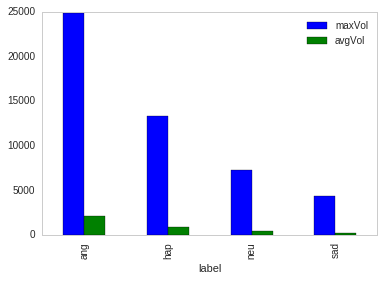

In [15]:
df.groupby('label').mean().plot(kind='bar')

In [16]:
X = df[['avgVol','maxVol']]
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
preds = logreg.predict(X_test)

Normalized confusion matrix
[[ 0.73972603  0.          0.26027397  0.        ]
 [ 0.27659574  0.          0.72340426  0.        ]
 [ 0.09230769  0.          0.90769231  0.        ]
 [ 0.01639344  0.          0.98360656  0.        ]]


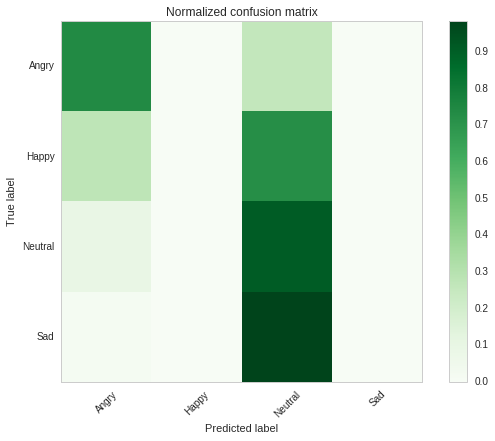

In [17]:
cnf_matrix = confusion_matrix(y_test, preds)
sns.set_style("whitegrid", {'axes.grid' : False})

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(['Angry','Happy','Neutral','Sad']))
    plt.xticks(tick_marks, ['Angry','Happy','Neutral','Sad'], rotation=45)
    plt.yticks(tick_marks, ['Angry','Happy','Neutral','Sad'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cm = confusion_matrix(y_test, preds)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

In [18]:
cm_normalized.trace()/4  # Average accuracy accross all 4 emotions

0.41185458377239198